In [46]:
import gymnasium as gym
import ale_py
from gymnasium.utils.play import play
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/nickk/anaconda3/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['info']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
gym.register_envs(ale_py)
env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
obs_0, info = env.reset()
obs, reward, terminated, truncated, info = env.step(1)
env.close()

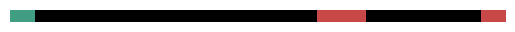

In [3]:
hand_raws = obs[-21: - 17,:,:]
plt.imshow(hand_raws)
plt.axis('off')
plt.show()


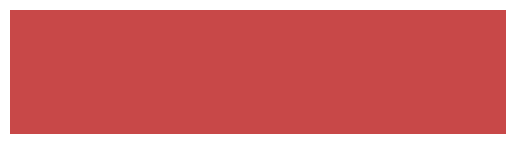

In [4]:
hand = hand_raws[:, 99:115, :]
plt.imshow(hand)
plt.axis('off')
plt.show()

In [5]:
print(hand[0,0,:])

[200  72  72]


In [ ]:
def find_rocket(obs):
    rocket_color = [200, 72, 72]  # RGB color of the rocket
    hand_raws = obs[-19, :,:]
    # match the color
    return np.where((hand_raws == rocket_color).all(1))[0][0]

In [51]:
find_rocket(obs)

99

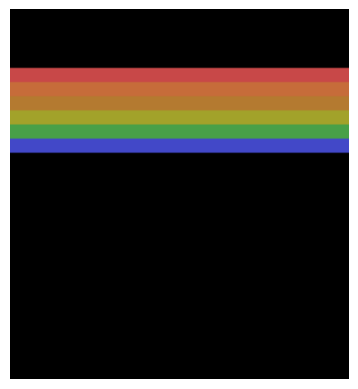

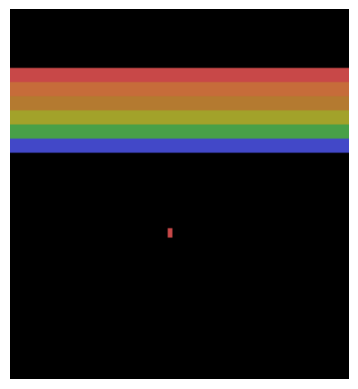

In [84]:
ball_area = obs[32:-21, 8:-8, :]
ball_area_0 = obs_0[32:-21, 8:-8, :]
plt.imshow(ball_area_0)
plt.axis('off')
plt.show()
plt.imshow(ball_area)
plt.axis('off')
plt.show()


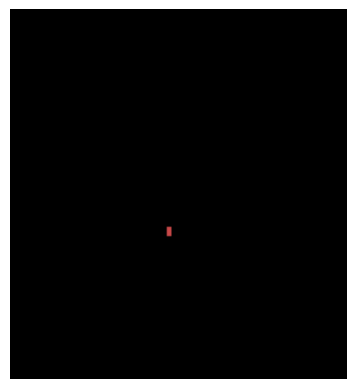

In [83]:
diff = np.abs(ball_area.astype(np.int16) - ball_area_0.astype(np.int16))
plt.imshow(diff.astype(np.uint8))
plt.axis('off')
plt.show()

In [167]:
env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
obs_0, info = env.reset()
obs, reward, terminated, truncated, info = env.step(1)
for _ in range(10):
    obs_0 = obs
    obs, reward, terminated, truncated, info = env.step(0)
env.close()

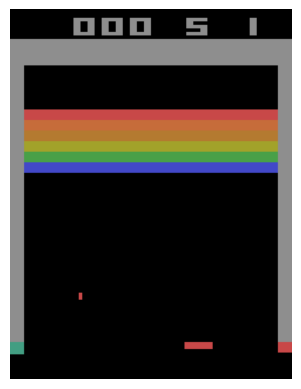

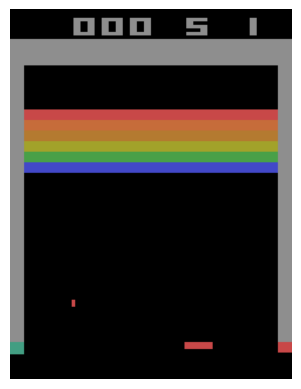

In [161]:
ball_area = obs
ball_area_0 = obs_0
plt.imshow(ball_area_0)
plt.axis('off')
plt.show()
plt.imshow(ball_area)
plt.axis('off')
plt.show()


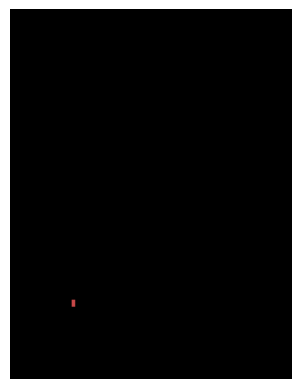

(array([165, 165, 166, 166, 167, 167, 168, 168]), array([35, 36, 35, 36, 35, 36, 35, 36]))


In [162]:
diff =  np.maximum(0, ball_area.astype(np.int16) - ball_area_0.astype(np.int16))
plt.imshow(diff.astype(np.uint8))
plt.axis('off')
plt.show()
diff_0 = np.sum(diff, axis=2)
print(np.where(diff_0 > 0))

In [ ]:
def find_ball(obs_0, obs):
    diff = np.maximum(0, obs.astype(np.int16) - obs_0.astype(np.int16))
    diff_sum = np.sum(diff, axis=2)
    x_indices, y_indices = np.where(diff_sum > 0)
    return x_indices[0], y_indices[0]

In [170]:
x, y = find_ball(obs_0, obs)
print(x, y)

165 35


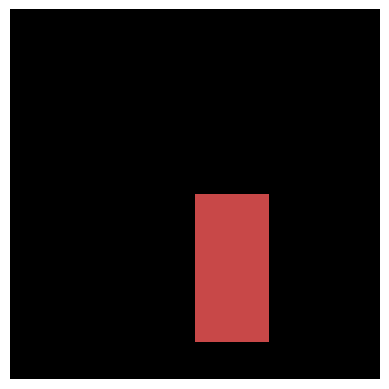

In [172]:
plt.imshow(obs[ x-5:x+5, y-5:y+5, :])
plt.axis('off')
plt.show()

In [173]:
obs[x, y, :]

array([200,  72,  72], dtype=uint8)